# 1. Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
df_train=pd.read_csv('Titanic_train.csv')
df_test=pd.read_csv('Titanic_test.csv')

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# defined a new coloumn called as code 1,2 to determin train and test data
df_train["code"] = 1
df_test["code"] = 2

In [ ]:
df_train.shape

(891, 13)

In [ ]:
df_test.shape

(418, 12)

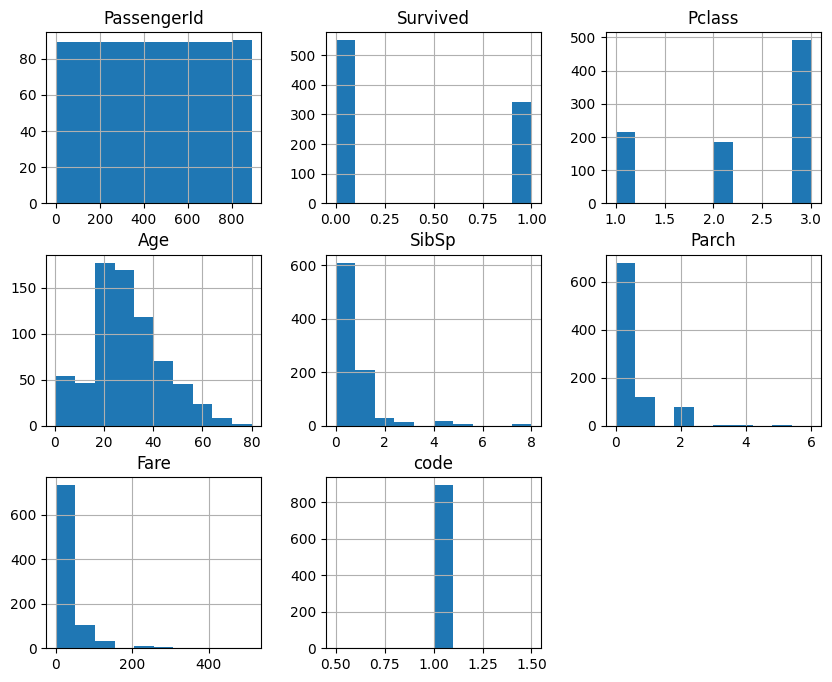

In [ ]:
#Create visualizations
df_train.hist(figsize=(10, 8))
plt.show()

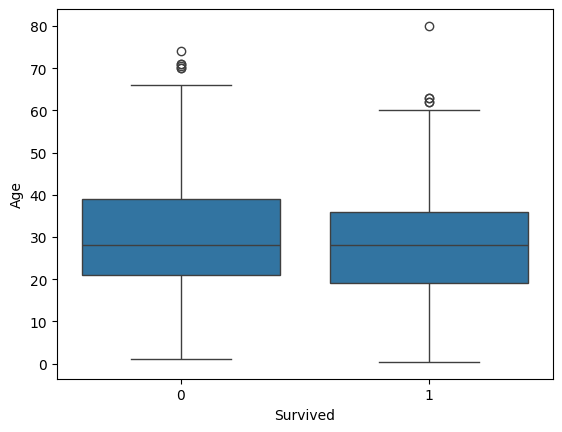

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.show()

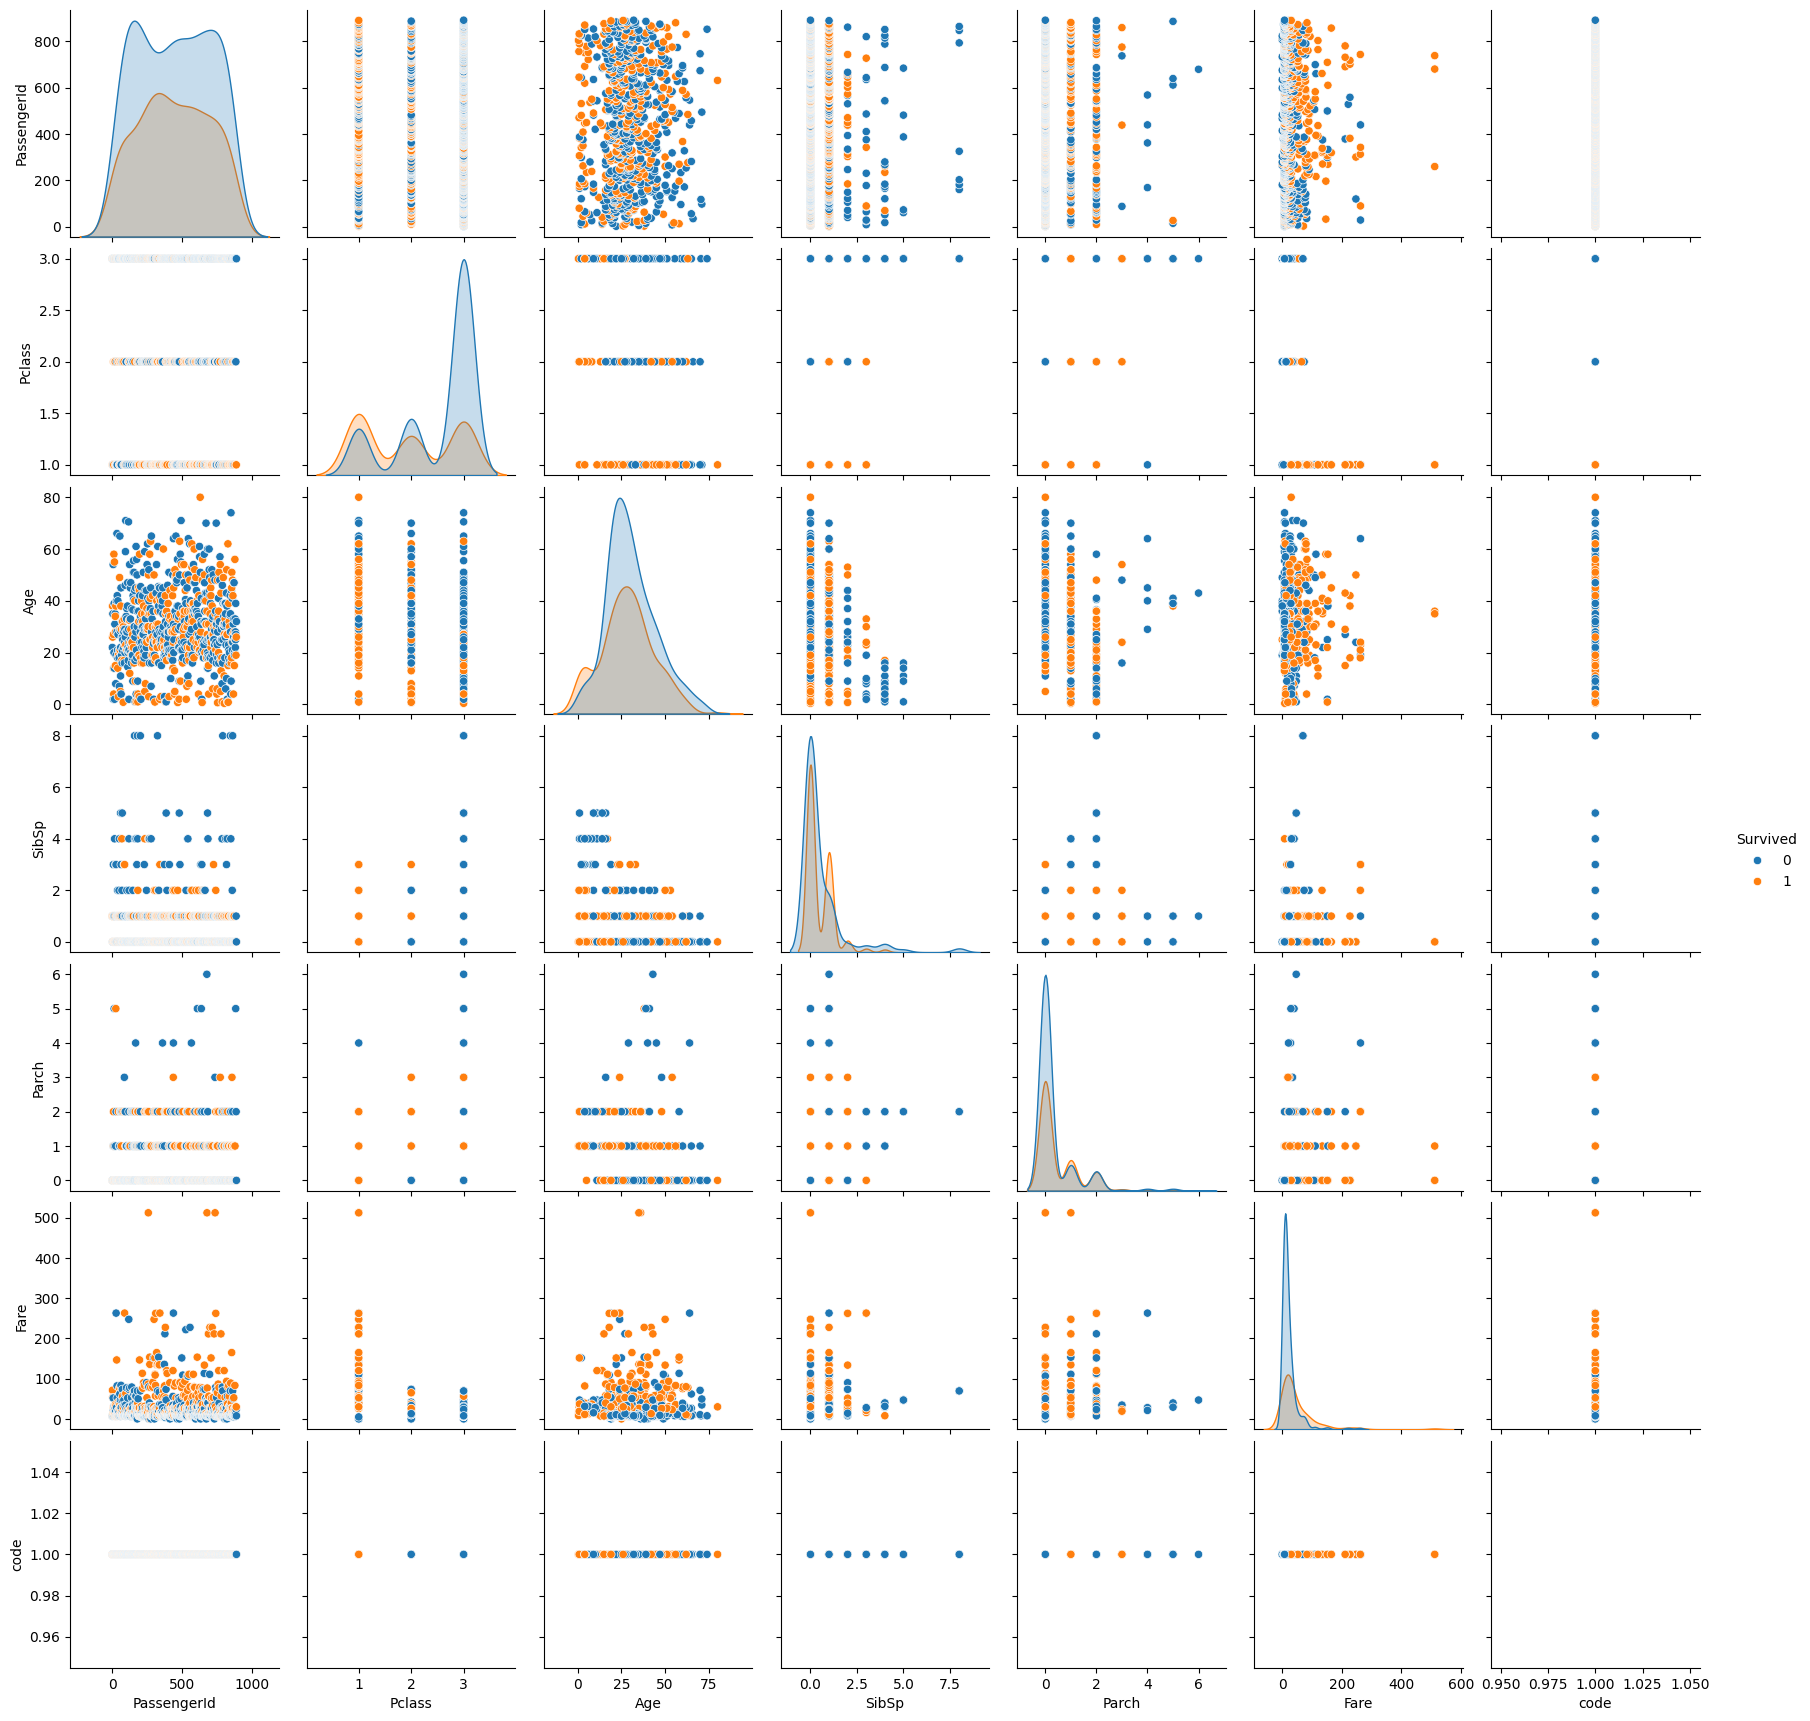

In [ ]:
# Pair plot to visualize relationships
sns.pairplot(df_train, hue='Survived')
plt.show()

In [ ]:
df=pd.concat([df_train,df_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,2
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,2
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,2


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'code'],
      dtype='object')

In [ ]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
code              0
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,1.319328
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000


# 2. Data Preprocessing

In [ ]:
#Data cleaning
df['Age'].fillna(df['Age'].median(),inplace=True)

In [ ]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [ ]:
df['Cabin'].isna().sum()/len(df['Cabin'])*100

77.46371275783041

In [ ]:
# since 77% of data blank so dropping it
#drop cabin column

df.drop('Cabin',axis=1,inplace=True)

In [ ]:
#data["Embarked"].dropna(axis=0,inplace=True)

new_df = df[(df["Embarked"] == "S") | (df["Embarked"] == "C") | (df["Embarked"] == "Q")]
new_df.shape

(1307, 12)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Embarked     1307 non-null   object 
 11  code         1307 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.7+ KB


In [ ]:
new_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1307.000000,889.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,655.319816,0.382452,2.296863,29.471821,0.499617,0.385616,33.209595,1.319816
std,377.922205,0.486260,0.836942,12.881592,1.042273,0.866092,51.748768,0.466584
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [ ]:
new_df.drop(new_df.columns[[3,8,10]],axis=1,inplace=True)

In [ ]:
new_df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
code             0
dtype: int64

In [ ]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,code
0,1,0.0,3,male,22.0,1,0,7.2500,1
1,2,1.0,1,female,38.0,1,0,71.2833,1
2,3,1.0,3,female,26.0,0,0,7.9250,1
3,4,1.0,1,female,35.0,1,0,53.1000,1
4,5,0.0,3,male,35.0,0,0,8.0500,1


In [ ]:
new_df['Sex']=new_df['Sex'].replace({'male':1,'female':0})

In [ ]:
df_new_train = new_df[new_df['code'] == 1]

In [ ]:
df_new_train.shape

(889, 9)

In [ ]:
df_new_test = new_df[new_df['code'] == 2]

In [ ]:
df_new_test.shape

(418, 9)

# 3. Model Building

In [ ]:
x_train = df_new_train[["Pclass","Age","SibSp","Parch","Fare",'Sex']]
y_train = df_new_train["Survived"]

In [ ]:
x_test = df_new_test[["Pclass","Age","SibSp","Parch","Fare",'Sex']]
y_test = df_new_test["Survived"]

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr.coef_

array([[-1.04959897, -0.03873725, -0.33608397, -0.09440067,  0.00297992,
        -2.64322684]])

In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_pred_test = lr.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_train,y_pred_train)
print("Training accuracy:", accuracy.round(2))

Training accuracy: 0.8


In [ ]:
y_pred_test

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

# 4. Model Evaluation


In [ ]:
 # Evaluate metrics (make sure 'y_pred' is defined, possibly as y_pred_test)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
roc_auc = roc_auc_score(y_train, y_pred_train)

In [ ]:
# Print results
results = pd.DataFrame([['Logistic Regression (Lasso)', accuracy, precision, recall, f1,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC AUC'])

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (Lasso),0.795276,0.743827,0.708824,0.725904,0.77882


In [ ]:
df_new_train["Y_proba"] = lr.predict_proba(x_train)[:,1]
df_new_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,code,Y_proba
0,1,0.0,3,1,22.0,1,0,7.2500,1,0.098945
1,2,1.0,1,0,38.0,1,0,71.2833,1,0.891334
2,3,1.0,3,0,26.0,0,0,7.9250,1,0.649620
3,4,1.0,1,0,35.0,1,0,53.1000,1,0.897197
4,5,0.0,3,1,35.0,0,0,8.0500,1,0.085167


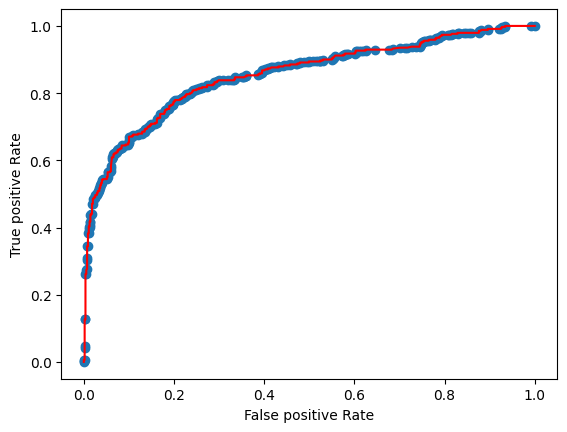

AUC score: 0.854


In [ ]:
fpr,tpr,dummy = roc_curve(y_train,df_new_train["Y_proba"])

import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

print("AUC score:", roc_auc_score(y_train,df_new_train["Y_proba"]).round(3))

# 5. Interpretation

In [ ]:
# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lr.coef_[0]
})
print(coefficients)


  Feature  Coefficient
0  Pclass    -1.049599
1     Age    -0.038737
2   SibSp    -0.336084
3   Parch    -0.094401
4    Fare     0.002980
5     Sex    -2.643227


# Interview Questions


---



### 1. What is Normalization & Standardization and how is it helpful?

Ans:-
#### Normalization
- **Definition:** Scaling features to a range, typically [0, 1].
- **Benefits:** Useful for algorithms like k-NN and neural networks, ensures features contribute equally, improves convergence speed.

#### Standardization
- **Definition:** Transforming features to have zero mean and unit variance.
- **Benefits:** Useful for algorithms assuming normally distributed data, like linear regression and SVM, ensures features are on the same scale, improves convergence stability.



---


### 2. What techniques can be used to address multicollinearity in multiple linear regression?

Ans:-
1. **Remove Highly Correlated Predictors:** Drop one predictor from pairs with high correlation.
2. **Principal Component Analysis (PCA):** Transform predictors into uncorrelated components.
3. **Partial Least Squares Regression (PLS):** Reduce predictors to components maximizing covariance with the response.
4. **Ridge Regression:** Adds a penalty to reduce coefficient magnitudes, mitigating multicollinearity.
5. **Lasso Regression:** Adds a penalty to encourage sparsity, effectively performing variable selection.
6. **Variance Inflation Factor (VIF):** Quantifies how much variance of a coefficient is inflated by multicollinearity; remove predictors with high VIF (e.g., VIF > 10).